[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


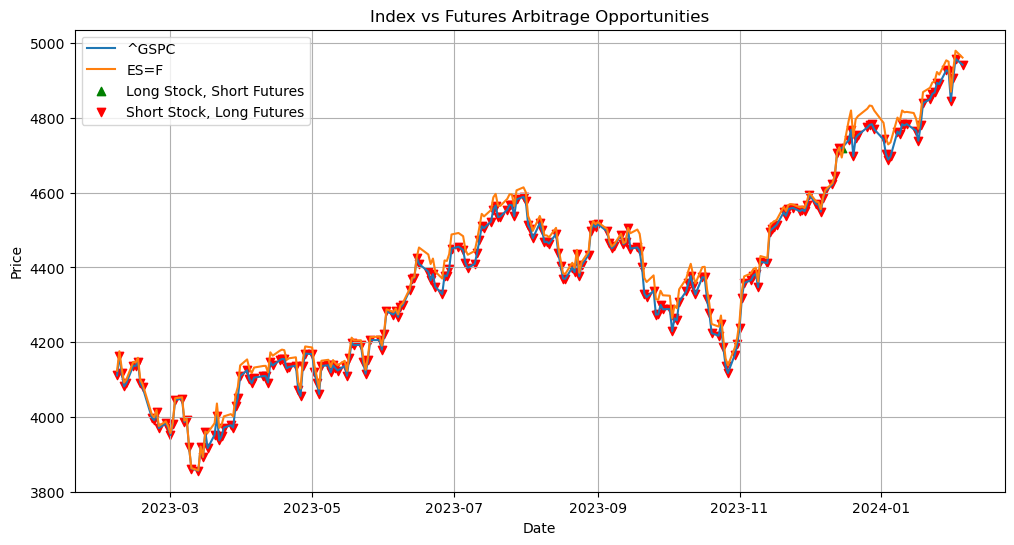

Arbitrage Opportunities:
Long Stock, Short Futures: 1 opportunities
Short Stock, Long Futures: 250 opportunities
Dynamic Historical Window: 2023-02-06 to 2024-02-06
Current Arbitrage Opportunity: Short Stock, Long Futures


In [18]:
# Import necessary libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Function to fetch historical data
def get_historical_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close']

# Function to calculate historical volatility
def calculate_volatility(data):
    return data.pct_change().std()

# Function to identify arbitrage opportunities
def identify_arbitrage_opportunities(index_data, futures_data, volatility, threshold_multiplier, fees):
    # Calculate the spread between index and futures
    spread = index_data - futures_data
    
    # Adjust the threshold based on historical volatility and fees
    threshold = volatility * threshold_multiplier
    
    # Adjust threshold based on fees
    for asset, fee_info in fees.items():
        if asset == spread.name:
            threshold += fee_info["min_spread"] / 100  # Convert percentage to units
    
    # Identify arbitrage opportunities
    long_arbitrage = spread[spread > threshold].index
    short_arbitrage = spread[spread < -threshold].index
    
    return long_arbitrage, short_arbitrage, threshold  # Return threshold as well

# Calculate dynamic start and end dates (setting back n years)
current_date = datetime.now()
start_date = (current_date - timedelta(days=1*365)).strftime('%Y-%m-%d')
end_date = current_date.strftime('%Y-%m-%d')

# Define the fee structure (CMC Fee Structure example)
fees = {
    "^GSPC": {"min_spread": 0.5, "margin_percentage": 5},
    "^VIX": {"min_spread": 3, "margin_percentage": 3.5}
}

# Fetch historical data for index and futures
index_data = get_historical_data('^GSPC', start_date, end_date)
futures_data = get_historical_data('ES=F', start_date, end_date)

# Calculate historical volatility
volatility = calculate_volatility(index_data)

# Identify arbitrage opportunities
threshold_multiplier = 2  # You can adjust this multiplier based on your risk tolerance
long_arbitrage, short_arbitrage, threshold = identify_arbitrage_opportunities(index_data, futures_data, volatility, threshold_multiplier, fees)

# Plot the data and highlight arbitrage opportunities
plt.figure(figsize=(12, 6))
plt.plot(index_data, label='^GSPC')
plt.plot(futures_data, label='ES=F')
plt.scatter(long_arbitrage, index_data.loc[long_arbitrage], marker='^', color='g', label='Long Stock, Short Futures')
plt.scatter(short_arbitrage, index_data.loc[short_arbitrage], marker='v', color='r', label='Short Stock, Long Futures')
plt.title('Index vs Futures Arbitrage Opportunities')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# Display descriptive output
print("Arbitrage Opportunities:")
print(f"Long Stock, Short Futures: {len(long_arbitrage)} opportunities")
print(f"Short Stock, Long Futures: {len(short_arbitrage)} opportunities")
print(f"Dynamic Historical Window: {start_date} to {end_date}")

# Determine the current spread
current_spread = index_data.iloc[-1] - futures_data.iloc[-1]

# Determine the current arbitrage opportunity
if current_spread > threshold:
    print(f"Current Arbitrage Opportunity: Long Stock, Short Futures")
elif current_spread < -threshold:
    print(f"Current Arbitrage Opportunity: Short Stock, Long Futures")
else:
    print("No current arbitrage opportunity.")
